In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('iris-data.csv', index_col=0)

In [3]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [4]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [5]:
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

#### Graficamos

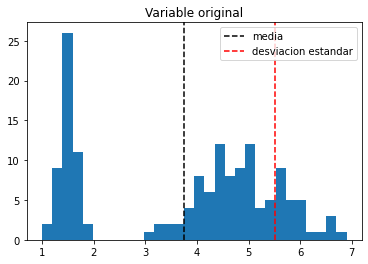

In [12]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins=30)
ax.axvline(x = np.mean(y), c = 'k', label='media', linestyle= '--')
ax.axvline(x = np.mean(y) +  np.std(y), c = 'r', label='desviacion estandar', linestyle= '--')
ax.legend()

Observamos una distribicion mimodal (con dos crestas)

### Estandarizamos la variable

- **Centrar**: Restar su media a cada uno de los valores originales
- **Reducir**: dividir todos sus valores por la desviacion estandar

El resultado de la aplicacion de la estandarizacion es una variable aleatoria Z:

- **Adimencional**: datos independientes de la escala
- Valor esperador (E) = 0 y Varianza(Z) = 1

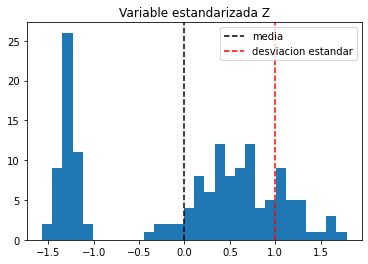

In [26]:
# Centrar y reducir
z = (y - np.mean(y)) / np.std(y)

fig, ax = plt.subplots()
ax.set_title('Variable estandarizada Z')
ax.hist(z, bins=30)
ax.axvline(x = np.mean(z), c = 'k', label='media', linestyle= '--')
ax.axvline(x = np.mean(z) +  np.std(z), c = 'r', label='desviacion estandar', linestyle= '--')
ax.legend()

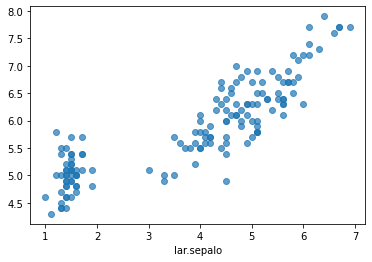

In [29]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha= 0.7)
ax.set_xlabel('lar.petalo')
ax.set_xlabel('lar.sepalo')
ax.autoscale()

#### Calculamos la covarianza

In [30]:
np.cov(df['lar.petalo'], df['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

La matriz de 2x2 nos indica en las esquinas inferior izquierda (1.27431544), y superior derecha ( 1.27431544) que podemos leer de ello es que tenemos una relacion positiva de 1.27431544, pero no sabemos la magnitud


#### Calculamos la correacion

In [35]:
corr = df.corr(method= 'kendall')
corr

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


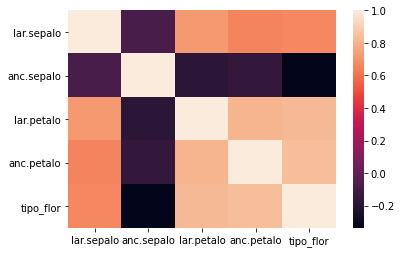

In [37]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)